In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

##### **Data Source**
https://www.kaggle.com/datasets/arashnic/covid19-hospital-treatment

Purpose
- To predict length of stay (LOS) of patients which importance for hospital management, including the healthcare worker arrangement, supply of healthcare treatment, and accessibility of other patients.

### **1. Exploring and cleaning data**
- Drop unused columns
- How many null value?
- Is type of the data proper?
- Visualization; distribution of numerical values and Number of categorical values

In [2]:
df = pd.read_csv('host_train.csv')

In [42]:
df.head()

,case_id,Hospital,Hospital_type,Hospital_city,Hospital_region,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility,Bed_Grade,patientid,City_Code_Patient,Type of Admission,Illness_Severity,Patient_Visitors,Age,Admission_Deposit,Stay_Days
0,1,8,2,3,2,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,2,5,2,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,4,1,0,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,1,2,1,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,1,2,1,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [12]:
df.drop(['case_id', 'patientid'], axis = 1, inplace = True)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 16 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Hospital                           318438 non-null  int64  
 1   Hospital_type                      318438 non-null  int64  
 2   Hospital_city                      318438 non-null  int64  
 3   Hospital_region                    318438 non-null  int64  
 4   Available_Extra_Rooms_in_Hospital  318438 non-null  int64  
 5   Department                         318438 non-null  object 
 6   Ward_Type                          318438 non-null  object 
 7   Ward_Facility                      318438 non-null  object 
 8   Bed_Grade                          318325 non-null  float64
 9   City_Code_Patient                  313906 non-null  float64
 10  Type of Admission                  318438 non-null  object 
 11  Illness_Severity                   3184

In [45]:
df.isnull().sum()

Hospital                                0
Hospital_type                           0
Hospital_city                           0
Hospital_region                         0
Available_Extra_Rooms_in_Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility                           0
Bed_Grade                             113
City_Code_Patient                    4532
Type of Admission                       0
Illness_Severity                        0
Patient_Visitors                        0
Age                                     0
Admission_Deposit                       0
Stay_Days                               0
dtype: int64

In [46]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Hospital,318438.0,18.318841,8.633755,1.0,11.0,19.0,26.0,32.0
Hospital_type,318438.0,1.256841,1.535712,0.0,0.0,1.0,2.0,6.0
Hospital_city,318438.0,4.771717,3.102535,1.0,2.0,5.0,7.0,13.0
Hospital_region,318438.0,0.778098,0.752527,0.0,0.0,1.0,1.0,2.0
Available_Extra_Rooms_in_Hospital,318438.0,3.197627,1.168171,0.0,2.0,3.0,4.0,24.0
Bed_Grade,318325.0,2.625807,0.873146,1.0,2.0,3.0,3.0,4.0
City_Code_Patient,313906.0,7.251859,4.745266,1.0,4.0,8.0,8.0,38.0
Patient_Visitors,318438.0,3.284099,1.764061,0.0,2.0,3.0,4.0,32.0
Admission_Deposit,318438.0,4880.749392,1086.776254,1800.0,4186.0,4741.0,5409.0,11008.0


In [47]:
df.columns

Index(['Hospital', 'Hospital_type', 'Hospital_city', 'Hospital_region',
       'Available_Extra_Rooms_in_Hospital', 'Department', 'Ward_Type',
       'Ward_Facility', 'Bed_Grade', 'City_Code_Patient', 'Type of Admission',
       'Illness_Severity', 'Patient_Visitors', 'Age', 'Admission_Deposit',
       'Stay_Days'],
      dtype='object')

In [3]:
#Change column that should not be numerical value
categorical_col = ['Hospital', 'Hospital_type', 'Hospital_city',
       'Hospital_region', 'Bed_Grade', 'City_Code_Patient']

df[categorical_col] = df[categorical_col].astype(str)

array([[<AxesSubplot:title={'center':'Available_Extra_Rooms_in_Hospital'}>,
        <AxesSubplot:title={'center':'Patient_Visitors'}>],
       [<AxesSubplot:title={'center':'Admission_Deposit'}>,
        <AxesSubplot:>]], dtype=object)

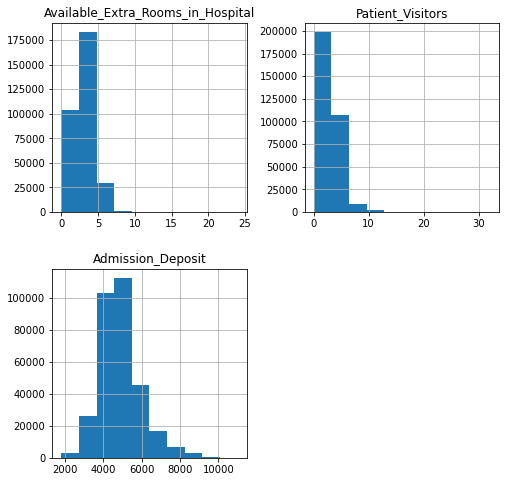

In [49]:
#Visualize data
df.hist(figsize = (8,8))

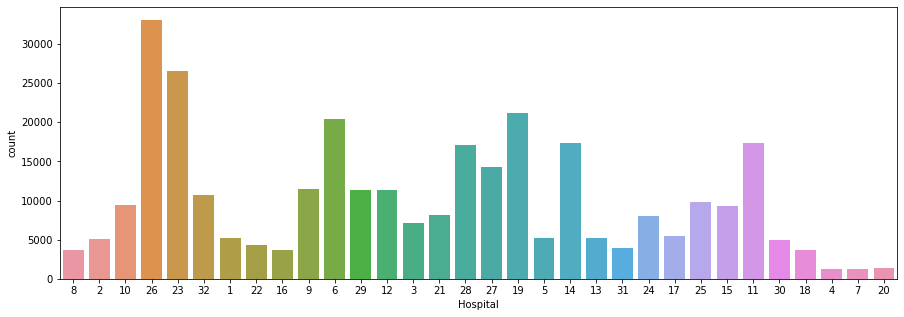

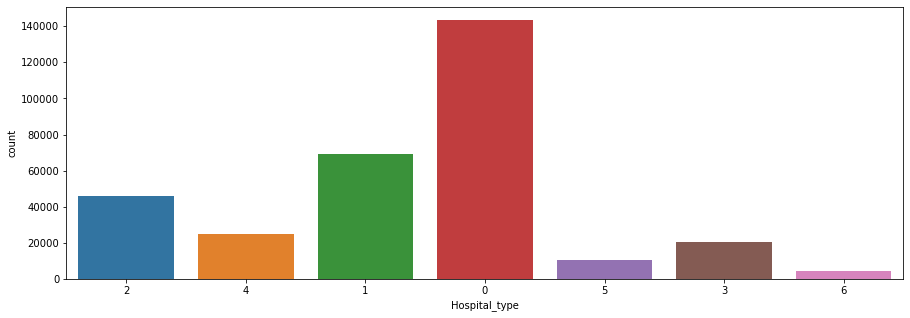

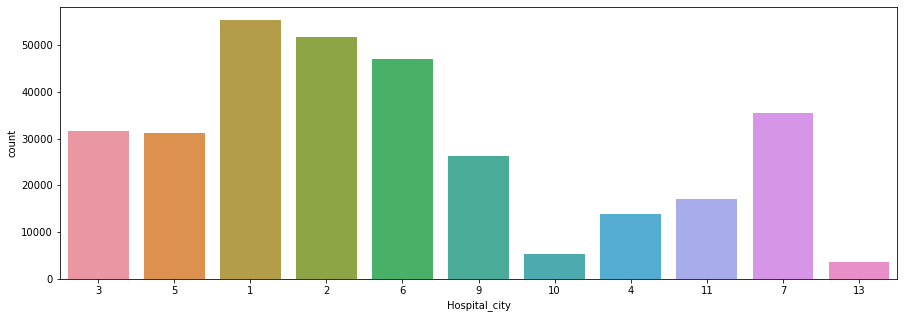

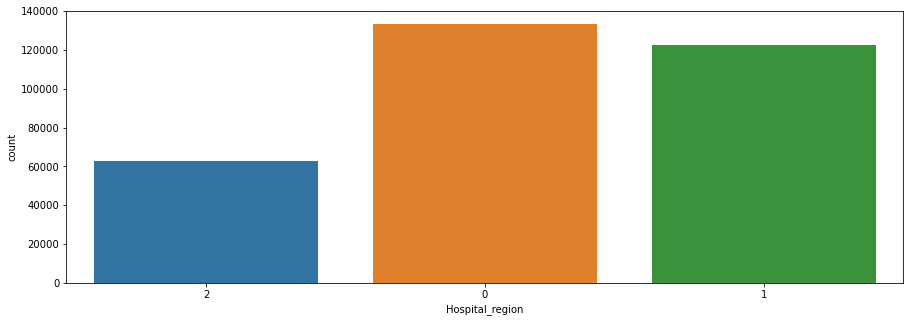

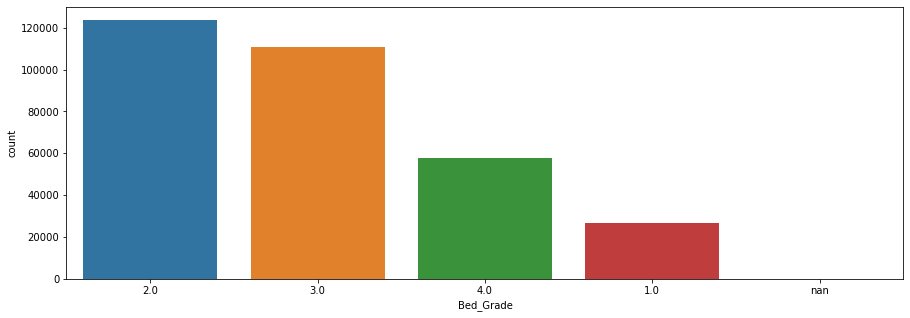

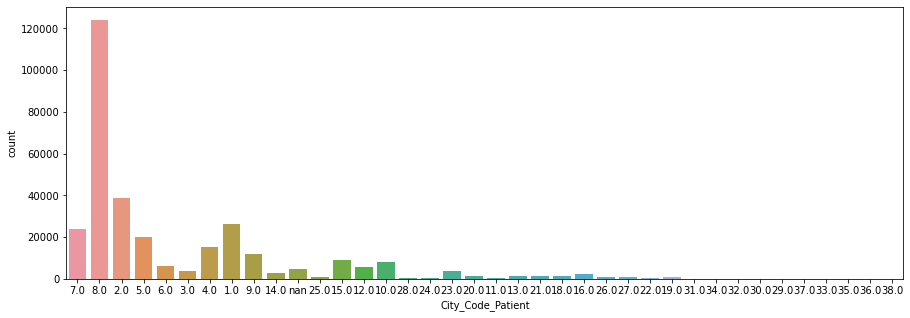

In [50]:
for col in categorical_col:
  fig, ax = plt.subplots(figsize = (15,5))
  sns.countplot(x = col, data = df)
  plt.show()

### **2. Preprocessing**
- Fill NA
- Group some categorical values to significant categories; Age and Length of stay (LOS) 
- Transform skew data to normal distribution

In [13]:
df2 = df.copy()

In [14]:
#Patients who went to same hospital are likely to live in same city
df2['City_Code_Patient'] = df2.groupby(by = 'Hospital_city')[['City_Code_Patient']].transform(lambda x: x.fillna(x.median()))

In [15]:
#Fill with most common value
df2['Bed_Grade'] = df2['Bed_Grade'].fillna(df2['Bed_Grade'].mode())

In [16]:
df2.isnull().mean()*100

Hospital                             0.0
Hospital_type                        0.0
Hospital_city                        0.0
Hospital_region                      0.0
Available_Extra_Rooms_in_Hospital    0.0
Department                           0.0
Ward_Type                            0.0
Ward_Facility                        0.0
Bed_Grade                            0.0
City_Code_Patient                    0.0
Type of Admission                    0.0
Illness_Severity                     0.0
Patient_Visitors                     0.0
Age                                  0.0
Admission_Deposit                    0.0
Stay_Days                            0.0
dtype: float64

In [17]:
#Divide LOS to Short, medium, and long stay 
short = ['0-10']
medium = ['11-20', '21-30', '31-40']
long = ['41-50', '51-60',  '71-80', 'More than 100 Days', '81-90', '61-70', '91-100']

df2.loc[df2['Stay_Days'].isin(short) == True, 'Stay_Days'] = 'short'
df2.loc[df2['Stay_Days'].isin(medium) == True, 'Stay_Days'] = 'medium'
df2.loc[df2['Stay_Days'].isin(long) == True, 'Stay_Days'] = 'long'

In [18]:
#Divide patients into young, adult, and elder according to risk of getting severe disease 
young = ['0-10', '11-20']
adult = ['21-30', '31-40', '41-50', '51-60']
elder = ['61-70', '71-80', '81-90', '91-100']

df2.loc[df2['Age'].isin(young) == True, 'Age'] = '1'
df2.loc[df2['Age'].isin(adult) == True, 'Age'] = '2'
df2.loc[df2['Age'].isin(elder) == True, 'Age'] = '3'

In [19]:
# Normalize skewed features using log_transformation
from scipy.stats import skew
numeric_features = df2.dtypes[df2.dtypes != object].index
skewed_features = df2[numeric_features].apply(lambda x: skew(x)).sort_values(ascending=False)
high_skew = skewed_features[skewed_features > 0.5]
skew_index = high_skew.index
    
for i in skew_index:
    df2[i] = np.log1p(df[i])

array([[<AxesSubplot:title={'center':'Available_Extra_Rooms_in_Hospital'}>,
        <AxesSubplot:title={'center':'Patient_Visitors'}>],
       [<AxesSubplot:title={'center':'Admission_Deposit'}>,
        <AxesSubplot:>]], dtype=object)

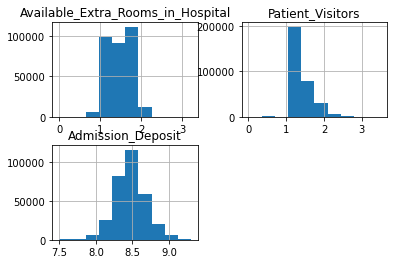

In [20]:
df2.hist()

### **3. Machine Learning**
- Seperate features and target
- Train&test split
- Pipeline for feature engineering and modelling 
- Cross validation 
- Model evaluation

In [32]:
X = df2.drop('Stay_Days', axis = 1)
y = df2['Stay_Days']

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [24]:
numerical_cols = ['Available_Extra_Rooms_in_Hospital', 'Patient_Visitors', 'Admission_Deposit']
categorical_cols = ['Hospital', 'Hospital_type', 'Hospital_city', 'Hospital_region',
        'Department', 'Ward_Type', 'Ward_Facility',  'City_Code_Patient', 'Type of Admission']
order_cols = ['Bed_Grade', 'Illness_Severity',  'Age']

# Preprocessing for numerical data
numerical_transformer = StandardScaler()

# Preprocessing for categorical data
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
Ordinal_transformer =  OrdinalEncoder()


# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols),
        ('order', Ordinal_transformer, order_cols)
    ], remainder="passthrough")

In [25]:
#Build classification model
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier

RF = RandomForestClassifier()
Ada = AdaBoostClassifier(n_estimators = 70)
XGB = XGBClassifier()

#Bundle pipeline for preprocessor and model 
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', Ada)
                             ])

In [64]:
#Serch for best parameter for model 
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

param_grid = {
    'model__n_estimators': [20, 50, 70, 100],
    'model__learning_rate': [0.01, 0.1, 1.0]
}

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)
grid_pipeline = GridSearchCV(pipeline, param_grid, cv=kfold)
grid_pipeline.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % grid_pipeline.best_score_)
print(grid_pipeline.best_params_)

In [27]:
#Fit model 
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['Available_Extra_Rooms_in_Hospital',
                                                   'Patient_Visitors',
                                                   'Admission_Deposit']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Hospital', 'Hospital_type',
                                                   'Hospital_city',
                                                   'Hospital_region',
                                                   'Department', 'Ward_Type',
                                                   'Ward_Facility',
                                                   'City_Code_Patient',
                

In [28]:
# Get predictions and accuracy of the model
y_pred = pipeline.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f'Accuracy score: {acc}')

Accuracy score: 0.7518998869488758


In [67]:
#Model evaluation with confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))

[[ 6218  8565    71]
 [ 2317 41479   349]
 [   54  4445   190]]
              precision    recall  f1-score   support

        long       0.72      0.42      0.53     14854
      medium       0.76      0.94      0.84     44145
       short       0.31      0.04      0.07      4689

    accuracy                           0.75     63688
   macro avg       0.60      0.47      0.48     63688
weighted avg       0.72      0.75      0.71     63688

